In [1]:
import pandas as pd
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import missingno as msno
import seaborn as sns
import pymc3

WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:
# Reading CSV data with Missing Values

df = pd.read_csv('climate-daily.csv')
df = df[['LOCAL_DATE', 'x', 'y', 'STATION_NAME', 'TOTAL_RAIN', 'TOTAL_PRECIPITATION', 
                     'TOTAL_SNOW', 'MEAN_TEMPERATURE', 'COOLING_DEGREE_DAYS', 'HEATING_DEGREE_DAYS']]
df.isna().sum()

C:\Users\Asif Rezwan\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (11,13,15,23,29,31,33,35) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


LOCAL_DATE                0
x                         0
y                         0
STATION_NAME              0
TOTAL_RAIN              238
TOTAL_PRECIPITATION    1299
TOTAL_SNOW             1249
MEAN_TEMPERATURE       2465
COOLING_DEGREE_DAYS    2465
HEATING_DEGREE_DAYS    2465
dtype: int64

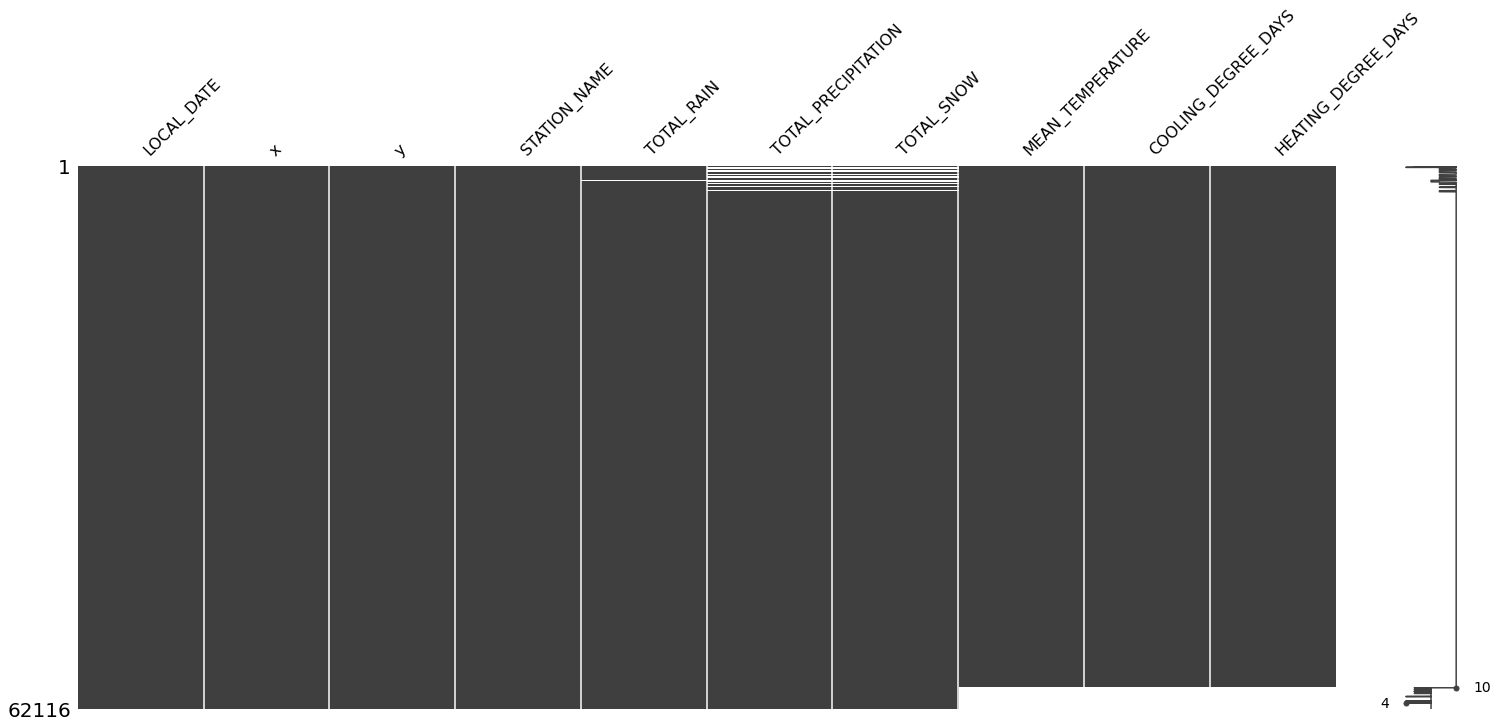

In [3]:
# Visualize MVs as a matrix 
msno.matrix(df) 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


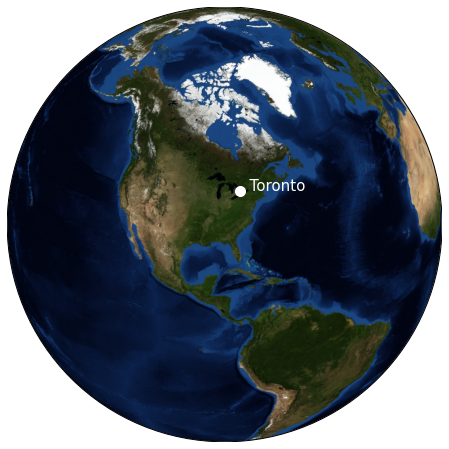

In [4]:
# Plotting the location of interest

fig = plt.figure(figsize=(8, 8))
m = Basemap(projection='ortho', resolution=None, width=8E6, height=8E6, lat_0=35, lon_0=-85,)
m.bluemarble(scale=0.5)

# Map (long, lat) to (x, y) for plotting
x, y = m(df['x'].iloc[1], df['y'].iloc[1])
plt.plot(x, y, 'ok', markersize=10, color='white')
plt.text(x, y, '  Toronto', fontsize=15, color='white');

In [5]:
# Converting 'LOCAL_TIME' to datetime
df['LOCAL_DATE'] = pd.to_datetime(df['LOCAL_DATE'])

# Setting 'LOCAL_DATE' as the index 
df.set_index('LOCAL_DATE', inplace=True)

In [6]:
# # Getting rid of MVs

# # Dropping the rows that have MVs in 'TOTAL_RAIN' column
# df = raw_df.dropna(subset=['TOTAL_RAIN'])

# # Filling the MVs in columns 'TOTAL_PRECIPITATION','TOTAL_SNOW' with 0
# df.update(df[['TOTAL_PRECIPITATION','TOTAL_SNOW']].fillna(0))

# # Interpolating the MVs in 'MEAN_TEMPERATURE', 'COOLING_DEGREE_DAYS' & 'HEATING_DEGREE_DAYS'
# df.interpolate(method='linear', inplace=True)

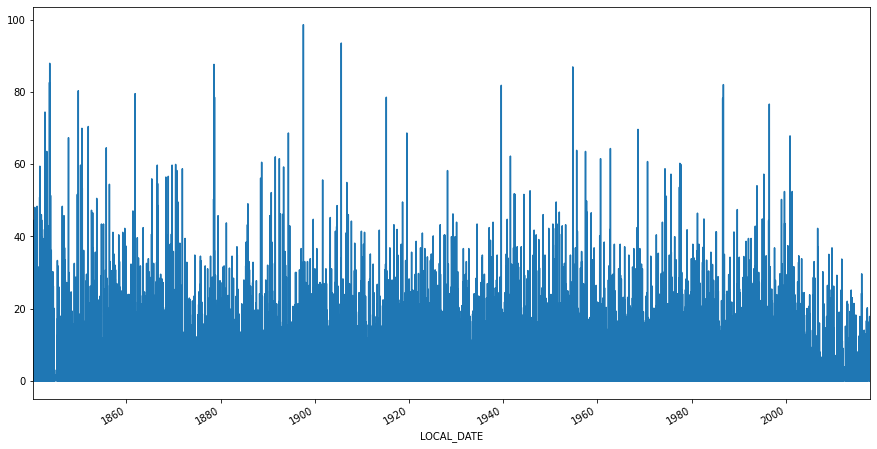

In [7]:
# Time series plott of TOTAL_RAIN
df_rain = df['TOTAL_RAIN'].dropna()
#df_rain.isna().sum()
df_rain.plot(figsize=(15,8))

In [8]:
# Top 10 highest rainfall days
pd.DataFrame(df_rain.sort_values(ascending=False).head(10))

,TOTAL_RAIN
LOCAL_DATE,
1897-07-27,98.6
1905-08-15,93.5
1843-09-14,87.9
1878-08-04,87.6
1954-10-15,86.9
1843-08-27,82.6
1986-10-09,82.0
1939-08-08,81.8
1849-10-07,80.3


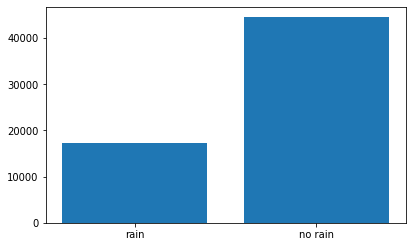

[17362, 44516]

In [9]:
# Rainy days vs dry days
#df_rain[df.TOTAL_RAIN == 0].count(), df_rain[df.TOTAL_RAIN > 0].count()

fig = plt.figure(figsize=(5,3))
ax = fig.add_axes([0,0,1,1])
days = ['rain', 'no rain']
counts = [df_rain[df.TOTAL_RAIN > 0].count(), df_rain[df.TOTAL_RAIN == 0].count()]
ax.bar(days,counts)
plt.show()
counts

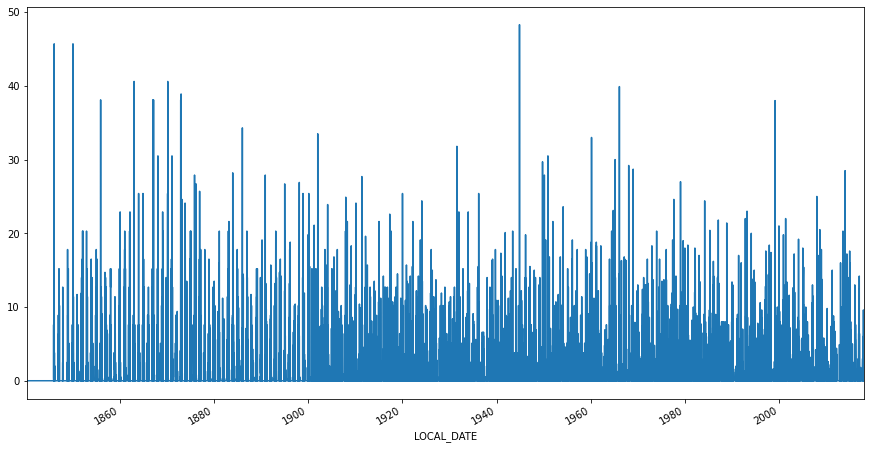

In [10]:
# Time series plott of TOTAL_SNOW
df_snow = df['TOTAL_SNOW'].dropna()
#df_snow.isna().sum()
df_snow.plot(figsize=(15,8))

In [11]:
# Top 10 highest snowfall days
pd.DataFrame(df_snow.sort_values(ascending=False).head(10))

,TOTAL_SNOW
LOCAL_DATE,
1944-11-12,48.3
1846-02-20,45.7
1850-02-14,45.7
1863-02-05,40.6
1870-03-27,40.6
1966-01-23,39.9
1873-01-24,38.9
1867-01-20,38.1
1855-12-29,38.1


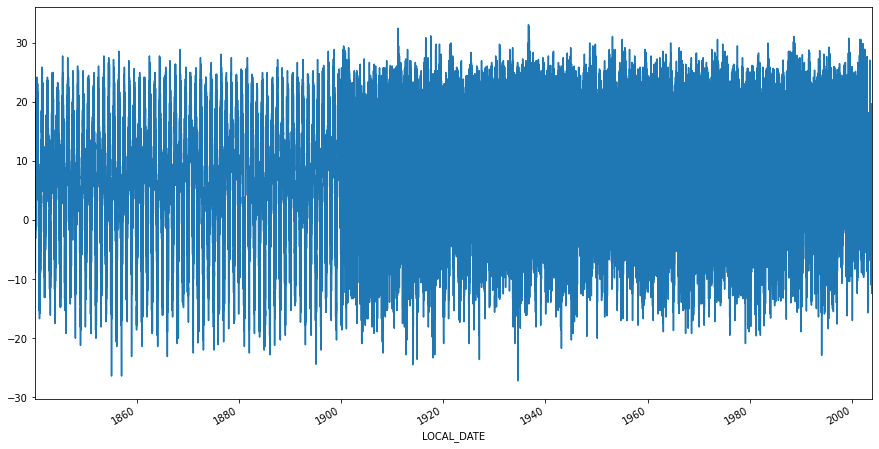

In [12]:
# Time series plott of MEAN_TEMPERATURE
df_temp = df['MEAN_TEMPERATURE'].dropna()
#df_temp.isna().sum()
df_temp.plot(figsize=(15,8))

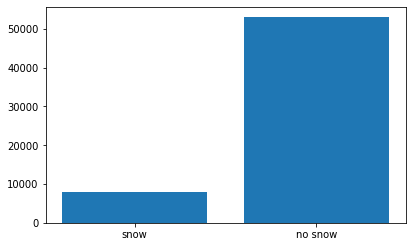

In [13]:
# Snowy days vs dry days
#df_snow[df.TOTAL_SNOW == 0].count(), df_snow[df.TOTAL_SNOW > 0].count()

fig = plt.figure(figsize=(5,3))
ax = fig.add_axes([0,0,1,1])
days = ['snow', 'no snow']
counts = [df_snow[df.TOTAL_SNOW > 0].count(), df_snow[df.TOTAL_SNOW == 0].count()]
ax.bar(days,counts,)
plt.show()

In [14]:
# Top 10 hottest days
pd.DataFrame(df_temp.sort_values(ascending=False).head(10))

,MEAN_TEMPERATURE
LOCAL_DATE,
1936-09-07,33.1
1936-10-07,32.8
1911-03-07,32.5
1917-07-30,31.2
1988-08-07,31.1
1953-02-09,31.1
1916-07-30,30.9
1999-05-07,30.8
1911-02-07,30.6


In [15]:
# Top 10 hottest days
pd.DataFrame(df_temp.sort_values(ascending=True).head(10))

,MEAN_TEMPERATURE
LOCAL_DATE,
1934-08-02,-27.2
1857-01-22,-26.4
1855-02-06,-26.4
1914-01-13,-24.5
1895-02-06,-24.4
1914-12-02,-23.6
1927-01-26,-23.6
1917-12-29,-23.3
1934-09-02,-23.1


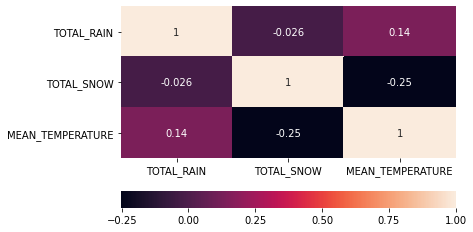

In [16]:
# Checking correlation among the major variables

df_wthr = df[['TOTAL_RAIN', 'TOTAL_SNOW', 'MEAN_TEMPERATURE']].dropna()
sns.heatmap(df_wthr.corr(), annot = True,  cbar_kws= {'orientation': 'horizontal'} )

In [19]:
df_rain.head(20)

LOCAL_DATE
1840-03-01    0.0
1840-03-02    1.3
1840-03-03    0.0
1840-03-04    0.0
1840-03-05    0.0
1840-03-06    0.0
1840-03-07    0.0
1840-03-08    0.0
1840-03-09    0.0
1840-03-10    0.0
1840-03-11    0.0
1840-03-12    0.0
1840-03-13    0.0
1840-03-14    0.0
1840-03-15    0.0
1840-03-16    0.0
1840-03-17    0.0
1840-03-18    0.0
1840-03-19    5.8
1840-03-20    2.3
Name: TOTAL_RAIN, dtype: float64